## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [17]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


首先，稍微清理一下数据，删除空值并仅选择其中一些列：

axis=1 表示在 DataFrame 上进行列级别的操作。 axis=0（默认值）表示沿着行的操作。dropna 表示删除包含缺失值（NaN）的行。

LabelEncoder()：scikit-learn 库中的一个类，用于将分类变量转换为整数标签。 .fit_transform:  LabelEncoder 对象的方法，用于拟合数据并进行转换。

apply: `apply` 方法可以应用一个函数到 DataFrame 的每一列或每一行。在这里是对每一列中的分类变量进行编码转换。

In [18]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info

<bound method DataFrame.info of       City Name  Package  Variety  Origin  Item Size  Color
2             1        3        4       3          3      0
3             1        3        4      17          3      0
4             1        3        4       5          2      0
5             1        3        4       5          2      0
6             1        4        4       5          3      0
...         ...      ...      ...     ...        ...    ...
1694         12        3        5       4          6      1
1695         12        3        5       4          6      1
1696         12        3        5       4          6      1
1697         12        3        5       4          6      1
1698         12        3        5       4          6      1

[991 rows x 6 columns]>

### 可视化 - 并列网格
Seaborn 提供了一些巧妙的方法来可视化你的数据。例如，你可以比较并列网格中每个点的数据分布。

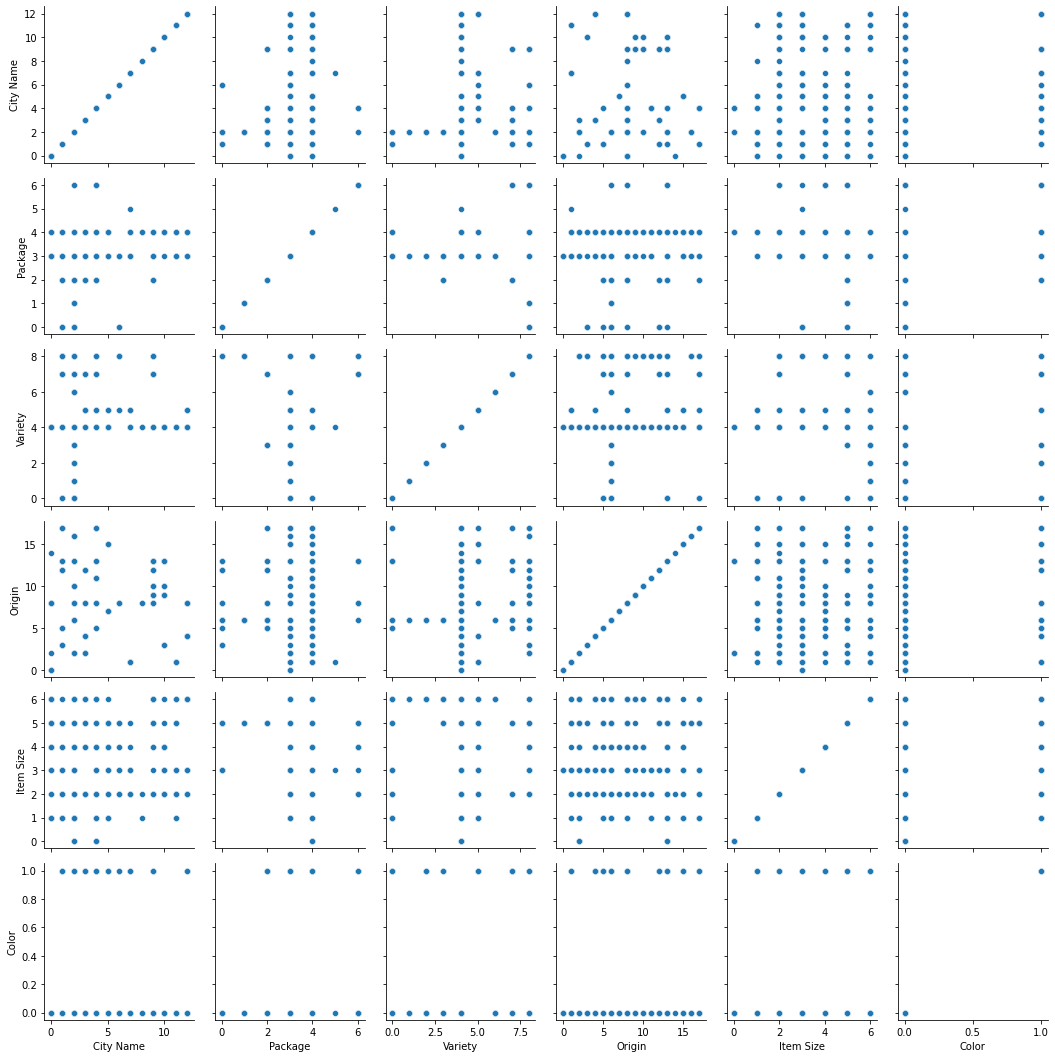

In [19]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

### 使用分类散点图
由于颜色是一个二元类别（橙色或非橙色），它被称为“分类数据”，需要一种更专业的方法来可视化。
使用“分类散点”图来显示值的分布：

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Color', ylabel='Item Size'>

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3543: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


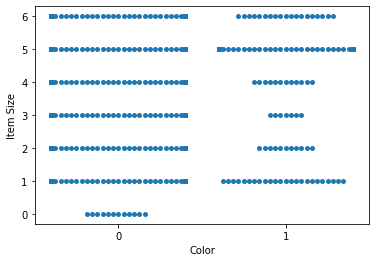

In [20]:
sns.swarmplot(x="Color", y="Item Size", data=new_pumpkins)

### 小提琴图
“小提琴”类型的图很有用，因为你可以轻松地可视化两个类别中数据的分布方式。小提琴图不适用于较小的数据集，因为分布显示得更“平滑”。

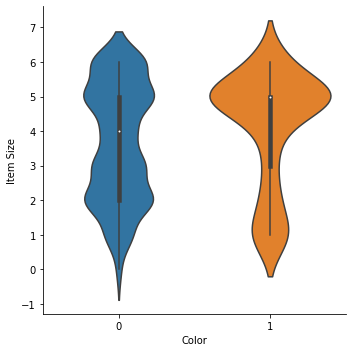

In [21]:
sns.catplot(x="Color", y="Item Size",
            kind="violin", data=new_pumpkins)

逻辑回归依赖于使用sigmoid 函数 的“最大似然”概念。绘图上的“Sigmoid 函数”看起来像“S”形。它接受一个值并将其映射到0和1之间的某个位置。它的曲线也称为“逻辑曲线”。它的公式如下所示：

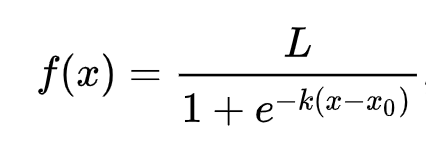

其中 sigmoid 的中点位于 x 的 0 点，L 是曲线的最大值，k 是曲线的陡度。如果函数的结果大于 0.5，则所讨论的标签将被赋予二进制选择的类“1”。否则，它将被分类为“0”。

选择要在分类模型中使用的变量，并调用 train_test_split() 拆分训练集和测试集：

In [22]:
from sklearn.model_selection import train_test_split

Selected_features = ['Origin','Item Size','Variety','City Name','Package']

X = new_pumpkins[Selected_features]
y = new_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

现在你可以训练你的模型，用你的训练数据调用 fit()，并打印出它的结果：

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Predicted labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Accuracy:  0.8140703517587939


### 混淆矩阵

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[162,   4],
       [ 33,   0]])

这里发生了什么？假设我们的模型被要求对两个二元类别之间的项目进行分类，即类别“南瓜”和类别“非南瓜”。

如果你的模型将某物预测为南瓜并且它实际上属于“南瓜”类别，我们将其称为真阳性，由左上角的数字显示。
如果你的模型预测某物不是南瓜，并且它实际上属于“南瓜”类别，我们将其称为假阳性，如右上角的数字所示。
如果你的模型将某物预测为南瓜并且它实际上属于“非南瓜”类别，我们将其称为假阴性，由左下角的数字显示。
如果你的模型预测某物不是南瓜，并且它实际上属于“非南瓜”类别，我们将其称为真阴性，如右下角的数字所示。

让我们借助混淆矩阵对TP/TN和FP/FN的映射，重新审视一下我们之前看到的术语：

🎓 precision：TP/(TP + FP) 检索实例中相关实例的分数（例如，哪些标签标记得很好）

🎓 召回率: TP/(TP + FN) 检索到的相关实例的比例，无论是否标记良好

🎓 F1分数: (2 * 准确率 * 召回率)/(准确率 + 召回率) 准确率和召回率的加权平均值，最好为1，最差为0

🎓 Support：检索到的每个标签的出现次数

🎓 accuracy：(TP + TN)/(TP + TN + FP + FN) 为样本准确预测的标签百分比。

🎓 宏平均值: 计算每个标签的未加权平均指标，不考虑标签不平衡。

🎓 加权平均值：计算每个标签的平均指标，通过按支持度（每个标签的真实实例数）加权来考虑标签不平衡。

### 可视化该模型的 ROC 曲线

.predict_proba()：这是分类模型中的一个方法，用于进行预测并返回预测结果的概率。它返回一个数组，每一行表示一个样本的各个类别的概率。

roc_curve 函数计算 ROC 曲线的真阳率（True Positive Rate，TPR）和假阳率（False Positive Rate，FPR）以及对应的阈值（thresholds）。

sns.lineplot([0, 1], [0, 1])绘制一条斜率为 1 的对角线

sns.lineplot(fpr, tpr) 横坐标是 FPR，纵坐标是 TPR


<Axes: >

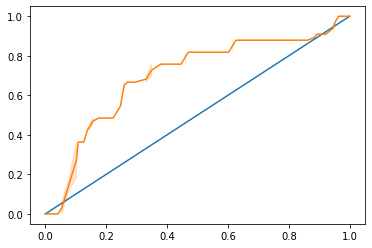

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)

 ROC 曲线通常用于根据分类器的真假阳性来了解分类器的输出。“ROC 曲线通常具有 Y 轴上的真阳性率和 X 轴上的假阳性率。” 
 
 因此，曲线的陡度以及中点线与曲线之间的空间很重要：你需要一条快速向上并越过直线的曲线。在我们的例子中，一开始就有误报，然后这条线正确地向上和重复：

 使用 Scikit-learn 的roc_auc_score API 来计算实际“曲线下面积”（AUC）：

In [28]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748


鉴于 AUC 的范围从 0 到 1，你需要一个高分，因为预测 100% 正确的模型的 AUC 为 1；在这种情况下，模型相当不错